# 1. Introduction


# 1. Introduction


## Description

Stroke Prediction Dataset

Dataset is taken from [Kaggle.com](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

Context:
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status

1) `id`: unique identifier
2) `gender`: "Male", "Female" or "Other"
3) `age`: age of the patient
4) `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) `ever_married`: "No" or "Yes"
7) `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) `Residence_type`: "Rural" or "Urban"
9) `avg_glucose_level`: average glucose level in blood
10) `bmi`: body mass index
11) `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) `stroke`: 1 if the patient had a stroke or 0 if not

### Objective
- To create a model to predict stroke

### Problem Statement
- What features are going to be useful as predictors?

# 2. Importing Libraries

In [12]:
from pathlib import Path


../../packages/outlier_handling.py
../../packages/checker.py
../../packages/imputation_handling.py
../../packages/__init__.py


In [1]:
import sys
from pathlib import Path

print(sys.path)

print('-' * 80)
# sys.path.insert(0, str(Path('../../packages/')))
sys.path.append(str(Path('../../')))

print(sys.path)

from packages.checker import check_missing

['/home/nikki/workspace/hacktiv8/ftds_learning_journal/phase_1/week_1', '/home/nikki/workspace/hacktiv8/env/lib/python38.zip', '/home/nikki/workspace/hacktiv8/env/lib/python3.8', '/home/nikki/workspace/hacktiv8/env/lib/python3.8/lib-dynload', '', '/home/nikki/workspace/hacktiv8/env/lib/python3.8/site-packages']
--------------------------------------------------------------------------------


NameError: name 'Path' is not defined

In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

sys.path.insert(Path('../../packages'))

# Useful functions
from packages.checker import check_missing, check_missing_special
from packages.outlier_handling import check_outlier, outlier_summary
from packages.outlier_handling import trim_cap_outliers
from packages.imputation_handling import prepare_imputation

import joblib

import warnings
warnings.filterwarnings('ignore')

# For Handling Missing Values
from feature_engine.imputation import CategoricalImputer

# For Data Preprocessing
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# For Classification Problems
from sklearn.linear_model import LogisticRegression

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Evaluate Classification Models
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

pd.set_option('display.precision', 2)

sns.set_theme(style='darkgrid', palette='Set1')

%matplotlib inline

ModuleNotFoundError: No module named 'packages'

# 3. Data Loading

In [2]:
# load dataset
df_ori = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df = df_ori.copy()

# display the first 5 rows of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# display the last 5 entries of the data
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


## Data Understanding

In [4]:
# check dataset shape
df.shape

(5110, 12)

There are 5110 entries and 12 columns of data

In [5]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# check missing values in dataset
df.isna().sum().sort_values(ascending=False)

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

There are 201 missing values

## Basic Characteristics of the Dataset

In [7]:
# check basic stats for features with number dtypes
df.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
id,5110.0,36517.83,21161.72,67.00,36932.00,72940.00
age,5110.0,43.23,22.61,0.08,45.00,82.00
hypertension,5110.0,0.10,0.30,0.00,0.00,1.00
heart_disease,5110.0,0.05,0.23,0.00,0.00,1.00
avg_glucose_level,5110.0,106.15,45.28,55.12,91.88,271.74
bmi,4909.0,28.89,7.85,10.30,28.10,97.60
stroke,5110.0,0.05,0.22,0.00,0.00,1.00


In [8]:
# check basic stats for features with object dtypes
df.describe(include='object').T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [9]:
# check the cardinality of each features
print("Features with low cardinality:")
for col in df.columns:
    if df[col].nunique() < 20:
        print(col, ':', df[col].nunique(), 'unique values \n', np.sort(df[col].unique()))
        print('-' * 100)

Features with low cardinality:
gender : 3 unique values 
 ['Female' 'Male' 'Other']
----------------------------------------------------------------------------------------------------
hypertension : 2 unique values 
 [0 1]
----------------------------------------------------------------------------------------------------
heart_disease : 2 unique values 
 [0 1]
----------------------------------------------------------------------------------------------------
ever_married : 2 unique values 
 ['No' 'Yes']
----------------------------------------------------------------------------------------------------
work_type : 5 unique values 
 ['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
----------------------------------------------------------------------------------------------------
Residence_type : 2 unique values 
 ['Rural' 'Urban']
----------------------------------------------------------------------------------------------------
smoking_status : 4 unique values 
 ['

Let's cover some basic stats of some numerical features in the train set.
- `feature`
    - pass

## Data Preparation

Handle cardinality in `feature`

Data looks good and is in accordance with the data design

## Check for Dataset Imbalance

Check whether the target variable of the dataset is balance

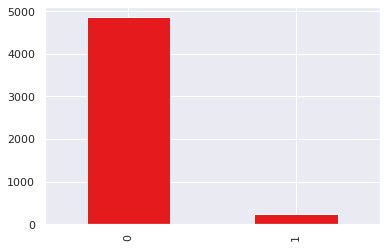

In [10]:
# check for imbalance in target variable
df['stroke'].value_counts().plot(kind='bar')
plt.show()

Since our dataset is imbalance, we need to stratify when splitting

## Splitting Dataset

We need to split the dataset into inference, train and test sets before we do any EDA.\
We do our EDA on the train set so as to not have any bias towards the whole dataset.

### Sample data for inference

In [11]:
# sample dataset for inference
df_inf = df.sample(10, random_state=42)

# remove inference set from original dataset
df_train_test = df.drop(df_inf.index).reset_index(drop=True)

# reset index for inference set
df_inf = df_inf.reset_index(drop=True)

print('df_inf Size:', df_inf.shape)

df_inf Size: (10, 12)


### Split train and test set


Since the target variable is imbalanced, we use stratified sampling

In [12]:
# we use stratified sampling to ensure that the distribution of the target variable is balanced
df_train, df_test = train_test_split(
    df_train_test,
    test_size=0.20,
    random_state=42,
    stratify=df_train_test['stroke']
)

print('df_train Size:', df_train.shape)
print('df_test Size:', df_test.shape)

df_train Size: (4080, 12)
df_test Size: (1020, 12)


In [13]:
# backup the train set that we are gonna perform EDA on
df_train_ori = df_train.copy()

# 4. Exploratory Data Analysis

# 5. Data Preprocessing

In [14]:
# restore the train set from the backup
df_train = df_train_ori.copy()

In [15]:
# split between features and target
X_train = df_train.drop(['stroke'], axis=1)
y_train = df_train['stroke'].copy()

X_test = df_test.drop(['stroke'], axis=1)
y_test = df_test['stroke'].copy()

## Categorizing Features

Categorize the features based on the variable type of the features and the data it represents
- Numeric (Interval): Features which have equally spaced interval between unique values
- Categorical (Nominal): Features which have no intrinsic ordering to the unique values
- Ordinal: Features which have clear ordering but do not have equally spaced intervals between unique values

In [16]:
X_train.select_dtypes('number').columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')

In [ ]:
# categorizing features
num_cols = [
    'age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
    'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'
]

nom_cols = [
    'job', 'marital', 'default', 'housing', 'loan', 'contact',
    'month', 'day_of_week', 'poutcome'
]

ord_cols = ['education']

## Handling Outliers

In [ ]:
# check outlier summary only on numerical features
outlier_summary(X_train[num_cols], 1.5)

,feats,skew,dist,tot_outlier,tot_outlier_pct
0,age,0.78,skewed,378,1.15
1,duration,3.31,skewed,2365,7.18
2,campaign,4.71,skewed,1935,5.87
3,pdays,-4.93,skewed,1210,3.67
4,previous,3.88,skewed,4499,13.66
5,emp_var_rate,-0.72,skewed,0,0.00
6,cons_price_idx,-0.23,normal,0,0.00
7,cons_conf_idx,0.30,normal,0,0.00
8,euribor3m,-0.70,skewed,0,0.00
9,nr_employed,-1.04,skewed,0,0.00


1. `Trimming`: if outliers' percentage < 5%
2. `Capping`: if outliers' percentage 5% - 15%
3. `None`: if outliers' percentage > 15%

In [ ]:
# check outlier details
check_outlier(X_train[num_cols], 1.5)

,feats,upper_bound,lower_bound,tot_right_tail,tot_left_tail,tot_right_tail_pct,tot_left_tail_pct,tot_outlier,tot_outlier_pct
0,age,69.50,9.50,378,0,1.15,0.00,378,1.15
1,duration,642.00,-222.00,2365,0,7.18,0.00,2365,7.18
2,campaign,6.00,-2.00,1935,0,5.87,0.00,1935,5.87
3,pdays,999.00,999.00,0,1210,0.00,3.67,1210,3.67
4,previous,0.00,0.00,4499,0,13.66,0.00,4499,13.66
5,emp_var_rate,6.20,-6.60,0,0,0.00,0.00,0,0.00
6,cons_price_idx,95.31,91.84,0,0,0.00,0.00,0,0.00
7,cons_conf_idx,-26.62,-54.39,0,0,0.00,0.00,0,0.00
8,euribor3m,10.39,-4.08,0,0,0.00,0.00,0,0.00
9,nr_employed,5421.60,4905.60,0,0,0.00,0.00,0,0.00


Trim and cap the outliers

In [ ]:
# print X_train and y_train shape before trimming and capping
print('X_train shape before trimming and capping:', X_train.shape)
print('y_train shape before trimming and capping:', y_train.shape)

# trim and cap outliers
X_train, y_train = trim_cap_outliers(
    X_train,
    exception_list = nom_cols + ord_cols,
    fold=1.5,
    target=y_train
)

# print X_train and y_train shape after trimming and capping
print('X_train shape after trimming and capping:', X_train.shape)
print('y_train shape after trimming and capping:', y_train.shape)

X_train shape before trimming and capping: (32942, 20)
y_train shape before trimming and capping: (32942,)
X_train shape after trimming and capping: (31430, 20)
y_train shape after trimming and capping: (31430,)


## Handling Missing Values


In [ ]:
# check missing values in train set
check_missing(X_train)

,feats,tot_missing,tot_missing_pct


In [ ]:
# check missing values in train target
y_train.isna().sum()

0

In [ ]:
# check missing values in test set
check_missing(X_test)

,feats,tot_missing,tot_missing_pct


In [ ]:
# check missing values in test target
y_test.isna().sum()

0

We have no `NaN` values in the train set nor test set. However, we do have missing values in the form of `unknown` and 999, so let's check for that

In [ ]:
# check for special missing values
check_missing_special(X_train).style.format({'tot_missing_pct': '{:.2f}%'})

,feats,tot_missing,tot_missing_pct
0,job,241,0.77%
1,marital,60,0.19%
2,education,1276,4.06%
3,default,6858,21.82%
4,housing,774,2.46%
5,loan,774,2.46%
6,pdays,31430,100.00%
7,poutcome,31430,100.00%


Since we have more than 90% of missing values in the feature `pdays` and `poutcome`, I'm not going to include it as a predictor. These two features are higly dependent since they are the results of last contact

For other features' missing values, aside from `default`, I'm going to impute them with the most frequent value in their subsequent features
`defaul` has around 21.82% of the dataset, which I think would be sufficient to stand as its own category, where it's also possible that we do not know the default status for a client, but still has to make a decision anyway

The missing values is not `NaN`, but `unknown`. So I'm going to replace these `unknown` values in those specific features with `NaN` to prepare for imputation

In [ ]:
# list of features that we want to impute
impute_cols = ['job', 'marital', 'education', 'housing', 'loan']

In [ ]:
# print shape before preparing for imputation
print('X_train shape before preparing for imputation:', X_train.shape)
print('X_test shape before preparing for imputation:', X_test.shape)

# perform prepare_imputation on X_train and X_test
X_train = prepare_imputation(X_train, impute_cols)
X_test = prepare_imputation(X_test, impute_cols)

# print shape after preparing for imputation
print('X_train shape after preparing for imputation:', X_train.shape)
print('X_test shape after preparing for imputation:', X_test.shape)

X_train shape before preparing for imputation: (31430, 20)
X_test shape before preparing for imputation: (8236, 20)
X_train shape after preparing for imputation: (31430, 20)
X_test shape after preparing for imputation: (8236, 20)


In [ ]:
# create imputer object
unknown_imputer = CategoricalImputer(
    imputation_method='frequent',
    variables=impute_cols
)

This object will later be run in a pipeline with scaling, which are the pre-oversampling procedures

## Feature Selection

### Heatmap Correlation Matrix for Numerical Features

We look at the Spearman's correlation matrix to find out the relation between features and target

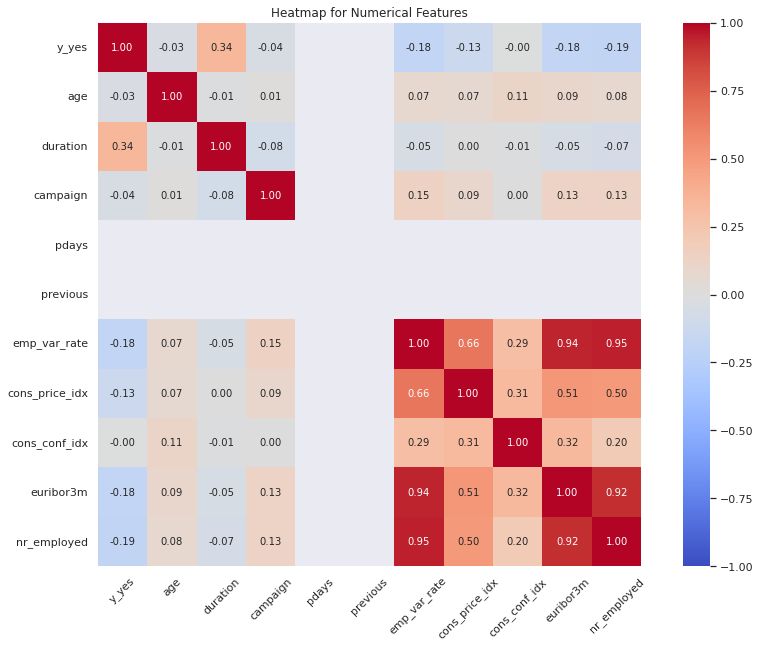

In [ ]:
# Heatmap Correlation Matrix
plt.figure(figsize=(15,10))

sns.heatmap(
    pd.concat([
        pd.get_dummies(y_train, prefix='y', drop_first=True),
        X_train[num_cols]], axis=1
    ).corr('spearman'),
    annot=True, vmin=-1, vmax=1, fmt='.2f', square=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Heatmap for Numerical Features')

plt.show()


- `y_yes` is a dummy variable which represents the target, with a value of `0 being no and 1 being yes`
- There are low spearman correlations amongst features and target, with the highest being `duration`
- But we have mentioned this before that `duration` is interdependent with the target variable `y`. Therefore, we are going to drop this feature
- We can see that social economic context features are quite highly correlated with each others. This are new features that were not available during the first research published
- We can also see that `pdays` and `previous` are highly dependent and also homogenous after outlier handling, since they are both features which resulted from the last contact. Since I'm dropping `pdays` because they have a lot of missing values, I will be dropping `previous` as well.

### Categorizing Selected Features

In [ ]:
# display outlier summary
outlier_summary(X_train[num_cols], 1.5).sort_values(by='dist')

,feats,skew,dist,tot_outlier,tot_outlier_pct
0,age,0.43,normal,24,0.08
3,pdays,0.00,normal,0,0.00
4,previous,0.00,normal,0,0.00
6,cons_price_idx,-0.22,normal,0,0.00
7,cons_conf_idx,0.28,normal,261,0.83
1,duration,1.05,skewed,0,0.00
2,campaign,1.18,skewed,0,0.00
5,emp_var_rate,-0.83,skewed,0,0.00
8,euribor3m,-0.85,skewed,0,0.00
9,nr_employed,-1.13,skewed,0,0.00


In [ ]:
# create list of numerical features with normal distribution
num_cols_norm = [
    'age', 'cons_price_idx', 'cons_conf_idx'
]

# create list of numerical features with skew
num_cols_skew = [
    'campaign', 'emp_var_rate', 'euribor3m', 'nr_employed'
]

# create final list of nominal features
nom_cols = [
    'job', 'marital', 'default', 'housing', 'loan', 'contact',
    'month', 'day_of_week'
]

# create final list of ordinal features
ord_cols = ['education']

Great! We have finalized our feature list.
We also separated numerical features with different types of distribution just in case we want to scale them using different methods

### List of Features

These are the predictors we're going to use

In [ ]:
# print out list of predictors
print('Numerical Features:')
print(num_cols_norm + num_cols_skew)
print('=' * 100)
print('Categorical Features:')
print(nom_cols)
print('=' * 100)
print('Ordinal Features:')
print(ord_cols)

Numerical Features:
['age', 'cons_price_idx', 'cons_conf_idx', 'campaign', 'emp_var_rate', 'euribor3m', 'nr_employed']
Categorical Features:
['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']
Ordinal Features:
['education']


Prepare the order for ordinal feature `education`

In [ ]:
# prepare education ordered categorical variable
education_order = [
    "illiterate",
    "basic.4y",
    "basic.6y",
    "basic.9y",
    "high.school",
    "professional.course",
    "university.degree",
]

## Feature Engineering

### Prepare The Necessary Objects

Declare the various objects, like scaler and encoder we might use
- All categorical features will use one hot encoder
- Ordinal features which is `education` will use ordinal encoder

In [ ]:
# declare standard scaler
std_sc = StandardScaler()

# declare min max scaling
mm_sc = MinMaxScaler()

# declare one hot encoder
ohe_enc = OneHotEncoder(handle_unknown='ignore')

# declare ordinal encoder
ord_enc = OrdinalEncoder(categories=[education_order])

# declare label encoder
label_enc = LabelEncoder()


Create ColumnTransformer, SMOTENC, and PCA objects
- In ColumnTransformer, we will design so that our dataset will have the categorical features lined up after the numerical ones

In [ ]:
# create column transformer object using min max scaler
scale_mm = ColumnTransformer([
    ('num_norm', std_sc, num_cols_norm),
    ('num_skew', mm_sc, num_cols_skew),
    ('nom', 'passthrough', nom_cols),
    ('ord', 'passthrough', ord_cols)
])

# create column transformer object for use after oversampling
encode = ColumnTransformer([
    ('num', 'passthrough', slice(0, 7)),
    ('nom', ohe_enc, slice(7, 15)),
    ('ord', ord_enc, [15])
])

# create smotenc object
# categorical features will be put at the end, after the numerical ones
smotenc = SMOTENC(
    categorical_features= list(range(7, 16)),
    random_state=42
)

# create pca object
pca = PCA(n_components=0.8, random_state=42)


In [ ]:
# create pipeline object for imputing and scaling
imputer_scaler_pipe = Pipeline([
    ('imputer', unknown_imputer),
    ('scale', scale_mm)
])

### Scaling

We need to scale all numerical columns before oversampling

In [ ]:
# scale numeric features 
X_train_scaled = imputer_scaler_pipe.fit_transform(X_train)
X_test_scaled = imputer_scaler_pipe.transform(X_test)

# print shape
print('X_train_scaled shape:', X_train_scaled.shape)
print('X_test_scaled shape:', X_test_scaled.shape)

X_train_scaled shape: (31430, 16)
X_test_scaled shape: (8236, 16)


### Oversampling

Since our data is imbalance, we need to perform oversampling

In [ ]:
# oversampling using SMOTE
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_scaled, y_train)

# print shape after oversampling
print('X_train_balanced shape:', X_train_balanced.shape)
print('y_train_balanced shape:', y_train_balanced.shape)

X_train_balanced shape: (57238, 16)
y_train_balanced shape: (57238,)


### Encoding

In [ ]:
# encode categorical features
X_train_encoded = encode.fit_transform(X_train_balanced)
X_test_encoded = encode.transform(X_test_scaled)

# encode labels
y_train_final = label_enc.fit_transform(y_train_balanced)
y_test_final = label_enc.transform(y_test)

# print shape
print('X_train_encoded shape:', X_train_encoded.shape)
print('X_test_encoded shape:', X_test_encoded.shape)
print('y_train_final shape:', y_train_final.shape)
print('y_test_final shape:', y_test_final.shape)

X_train_encoded shape: (57238, 46)
X_test_encoded shape: (8236, 46)
y_train_final shape: (57238,)
y_test_final shape: (8236,)


### Dimensionality Reduction

In [ ]:
# perform dimensionality reduction
X_train_final = pca.fit_transform(X_train_encoded)
X_test_final = pca.transform(X_test_encoded)

# print shape
print('X_train_final shape:', X_train_final.shape)
print('y_train_final shape:', y_train_final.shape)
print('X_test_final shape:', X_test_final.shape)
print('y_test_final shape:', y_test_final.shape)

X_train_final shape: (57238, 10)
y_train_final shape: (57238,)
X_test_final shape: (8236, 10)
y_test_final shape: (8236,)


We can see that we have reduced the number of features from 50 to 10. The dataset is now about 20% of its original size. Quite a good compression

Let's see how it would look like in 2D

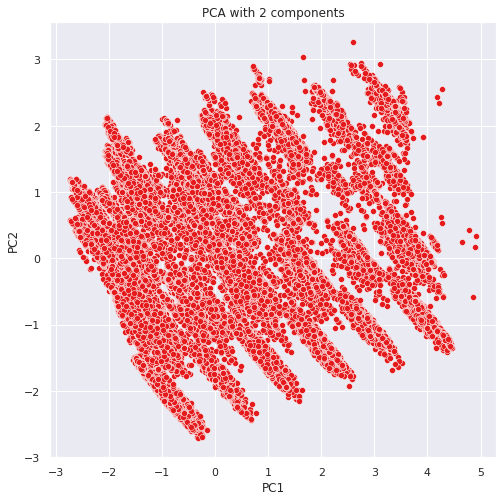

In [ ]:
# plot pca with 2 components
pca_2d = PCA(n_components=2, random_state=42)
X_2d  = pca_2d.fit_transform(encode.fit_transform(X_train_balanced))

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 2 components')
plt.show()

Preprocessing is finished

# 6. Model Definition

In [ ]:
%%time

# model declaration
model_logreg = LogisticRegression()

CPU times: user 23 µs, sys: 4 µs, total: 27 µs
Wall time: 48.9 µs


# 7. Model Training

In [ ]:
%%time

# model training
model_logreg.fit(X_train_final, y_train)

CPU times: user 389 ms, sys: 437 ms, total: 826 ms
Wall time: 286 ms


LogisticRegression()

It took around 4s to train the model. I'd say it's pretty good

# 8. Model Evaluation

In [ ]:
%%time

# predict train-set
y_pred_train = model_logreg.predict(X_train_final)

# predict test-set
y_pred_test = model_logreg.predict(X_test_final)

CPU times: user 17.2 ms, sys: 20.3 ms, total: 37.5 ms
Wall time: 12.2 ms


Took around 100ms to run. Pretty good

In [ ]:
print('MAE train:', mean_absolute_error(y_train, y_pred_train))
print('MAE test:', mean_absolute_error(y_test, y_pred_test))

print('-' * 10)
print('MSE train:', mean_squared_error(y_train, y_pred_train))
print('MSE test:', mean_squared_error(y_test, y_pred_test))

print('-' * 10)
print('RMSE train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('-' * 10)
print('R2 Score train:', r2_score(y_train, y_pred_train))
print('R2 Score test:', r2_score(y_test, y_pred_test))

MAE train: 0.05033809166040571
MAE test: 0.047058823529411764
----------
MSE train: 0.05033809166040571
MSE test: 0.047058823529411764
----------
RMSE train: 0.22436152000823517
RMSE test: 0.21693045781865616
----------
R2 Score train: -0.06811594202898585
R2 Score test: -0.029025410370121296


The model had a score of 0.928 for the coefficient of determination of the prediction.\
It's quite good to be used


# 9. Model Inference

# 10. Conclusion